# Inaugural Project

Imports and set magics:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We are defining all variables and functions in our py.file. We then create 2 arrays with numbers between 0 and 1, for the x-values for person A. We then set up 2 empty arrays, that we are gonna use to fill up with the possible consumption of goods. We do this by making a loop that adds values to the array, if the utility is better or equal to the utility from the endownment. 

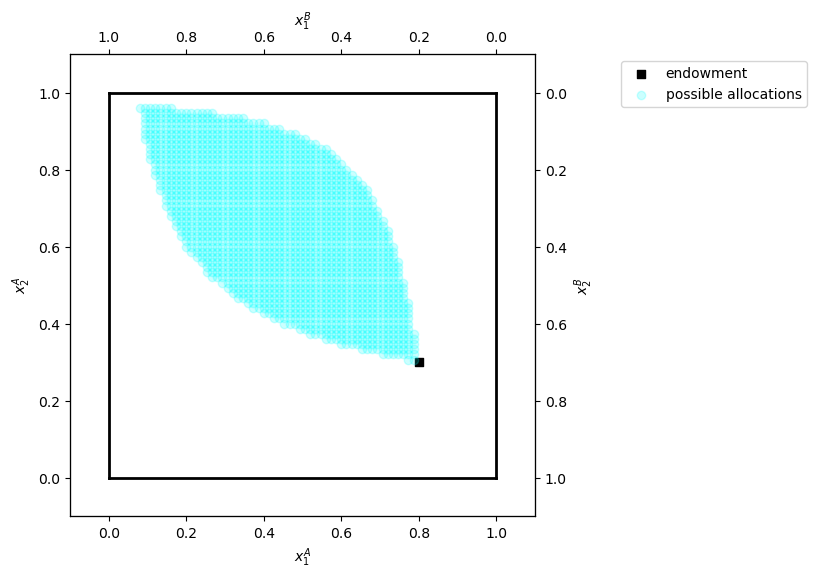

In [45]:
# Initialize the model
model = ExchangeEconomyClass()

# Calculate possible allocations
N = 75
x1possible, x2possible = model.calculate_possible_allocations(N)

# Now we plot an Edgeworth box with the initial endownment shown and all the possible values (allocations) found above. 
model.plot_edgeworth_box(x1possible, x2possible)

# Question 2

We know that our check_market_clearing gives us two values. 
One for the first error term and one of the second error term. 
See # in the code for decription of each step. 

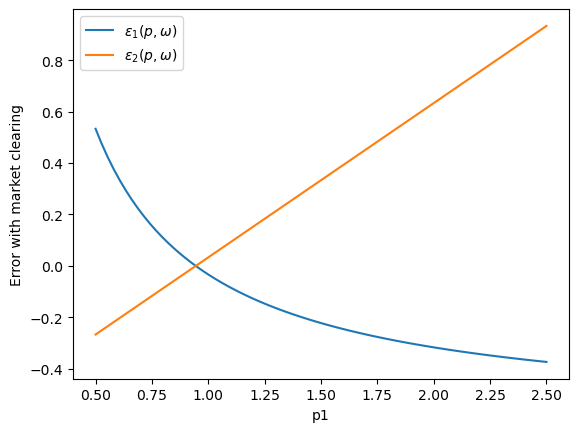

In [46]:
# Define the range of prices
p1_values = np.linspace(0.5, 2.5, N+1)

# We use the range of prices in our market clearing errors function to calculate market clearing errors. 
error_term_1, error_term_2 = model.calculate_market_clearing_errors(p1_values)

# We then plot the market clearing errors
model.plot_market_clearing_errors(p1_values, error_term_1, error_term_2)



# Question 3

To find the market clearing price we expect that the error term closest to 0 gives us the p1 that clears the market. In the py.file we have defined find_market_clearing_price, which calculate the sum of squared errors, and then use scipy.optimize minimize function to find the value of p1 that minimizes this function. 

In [47]:
#Find the market clearing price using optimization
market_clearing_p1 = model.find_market_clearing_price()

# Print the market clearing price
print(f'The market clearing price is p1 = {market_clearing_p1:.2f}')


The market clearing price is p1 = 0.94


# Question 4a.

Now we will find the allocation when prices only are allowed to be in the defined P1. 


In [48]:
# Find the best allocation with the restricted price set
best_allocation_p1, util_A_best, x1A_best, x2A_best = model.find_best_allocation_with_p1_set(p1_values)

# Print the best allocation and utility
print(f'She chooses the price p1 = {best_allocation_p1:.3f} so her utility is then {util_A_best:.3f}')
print(f'Therefore her allocation of the goods are: x1A = {x1A_best:.3f} and x2A = {x2A_best:.3f}')


She chooses the price p1 = 1.887 so her utility is then 0.634
Therefore her allocation of the goods are: x1A = 0.619 and x2A = 0.641


# Question 4b.

We will do the same as in question 4a. 
But now the price can take any value. 
So the new thing in 4b. is that we choose an array between 0 and 50, which are the new possible values of the price, p1. 

In [49]:
#Find the optimal allocation
optimal_p1, x1A, x2A = model.find_optimal_allocation()

# Print the optimal allocation and price
print(f'The optimal price is p1 = {optimal_p1:.3f}')
print(f'The optimal allocation for A is x1A = {x1A:.3f}, x2A = {x2A:.3f}')
print(f'The utility for optimal allocation for A is = {model.utility_A(x1A, x2A):.3f}')

The optimal price is p1 = 1.899
The optimal allocation for A is x1A = 0.621, x2A = 0.640
The utility for optimal allocation for A is = 0.634


We see that the allocantion that she ends up with is nearly identical as the one she gets, if the price only can be chosen from p1. 

# Question 5a.

When only the choice is restricted to be in C, we use our result frpm question 1, to set uo a loop to find the best allocation. 

In [50]:
# Find the best allocation in set C
util_A_better, x1A_op, x2A_op, util_B_op = model.find_best_allocation_in_C(x1possible, x2possible)

# Print the best allocation in set C
print(f'Utility A max = {util_A_better:.3f}: (x1A, x2A) = ({x1A_op:.3f}, {x2A_op:.3f})')
print(f'Utility B max = {util_B_op:.3f}: (x1B, x2B) = ({1 - x1A_op:.3f}, {1 - x2A_op:.3f})')


Utility A max = 0.742: (x1A, x2A) = (0.560, 0.853)
Utility B max = 0.305: (x1B, x2B) = (0.440, 0.147)


# Question 5b.

Now the only restriction is, that B's utility have to be at least as good as the intial utility of the endownment. To solve this we create 2 lists with linear numbers between 0 to 1. Then we set up a loop to find the best allocation. 

In [51]:
# Find the best allocation with no further restrictions using optimization
x_1_opti, x_2_opti, util_A_better_2, util_B_opti = model.find_best_allocation_no_restriction()

# Print the best allocation and utility
print(f'Utility A max = {util_A_better_2:.3f}: (x1A, x2A) = ({x_1_opti:.3f}, {x_2_opti:.3f})')
print(f'Utility B max = {util_B_opti:.3f}: (x1B, x2B) = ({1 - x_1_opti:.3f}, {1 - x_2_opti:.3f})')


Utility A max = 0.743: (x1A, x2A) = (0.576, 0.844)
Utility B max = 0.304: (x1B, x2B) = (0.424, 0.156)


# Question 6a.

In [52]:
# Find the allocation chosen by a utilitarian social planner using optimization
util_A_social, x1A_opti_social, x2A_opti_social, util_A_opt, util_B_opt = model.find_social_planner_allocation()

# Print the allocation and utility
print(f'Utility A + B max = {util_A_social:.3f}: The allocation is (x1A, x2A) = ({x1A_opti_social:.3f}, {x2A_opti_social:.3f}), (x1B, x2B) = ({1 - x1A_opti_social:.3f}, {1 - x2A_opti_social:.3f})')
print(f'Utility A = {util_A_opt:.3f}, Utility B = {util_B_opt:.3f}')



Utility A + B max = 1.058: The allocation is (x1A, x2A) = (0.333, 0.667), (x1B, x2B) = (0.667, 0.333)
Utility A = 0.529, Utility B = 0.529


# Question 6b.

We now illustrate the allocations from the results in the edgeworthbox from question 1. 

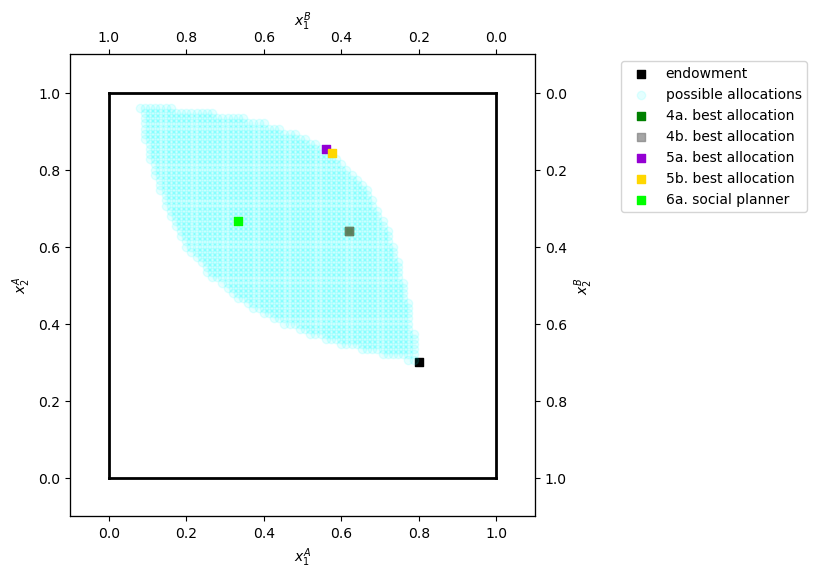

Utility from question 4a: 1.007
Utility from question 4b: 1.006
Utility from question 5a: 1.047
Utility from question 5b: 1.047
Utility from question 6a: 1.058


In [53]:
# Use previous results to plot all allocations and use utility to compare them at last
best_allocation_4a = (util_A_best + model.utility_B(1-x1A_best,1-x2A_best), x1A_best, x2A_best)
best_allocation_4b = (model.utility_A(x1A, x2A)+ model.utility_B(1-x1A,1-x2A), x1A, x2A)
best_allocation_5a = (util_A_better + model.utility_B(1-x1A_op,1-x2A_op), x1A_op, x2A_op)
best_allocation_5b = (util_A_better_2 + model.utility_B(1-x_1_opti,1-x_2_opti), x_1_opti, x_2_opti)
best_allocation_6a = (util_A_social, x1A_opti_social, x2A_opti_social)

# Plot all allocations in the Edgeworth box
model.plot_all_allocations(x1possible, x2possible, best_allocation_4a, best_allocation_4b, best_allocation_5a, best_allocation_5b, best_allocation_6a)

#At last, we print the utilies from the different questions to compare them
print(f'Utility from question 4a: {best_allocation_4a[0]:.3f}')
print(f'Utility from question 4b: {best_allocation_4b[0]:.3f}')
print(f'Utility from question 5a: {best_allocation_5a[0]:.3f}')
print(f'Utility from question 5b: {best_allocation_5b[0]:.3f}')
print(f'Utility from question 6a: {best_allocation_6a[0]:.3f}')



The total utilites from the 5 different questions are shown above the edgeworthbox. As we mentioned in question 4b, the allocations in 4a and 4b is very similiar, why we can only see one of them in the Edgeworthbox. It is seen that the highest total amount of utility is accomplished by the social planner and not when person A chooses. 
This results come from the following: 
When A is choosing the allocation she will try to maximze her own utility, and doest not take B's utlity into account, as long as B is not worse off with regards to the endownment. 
When the social planner is chosing the allocation, she takes both persons utility into account. 


# Question 7

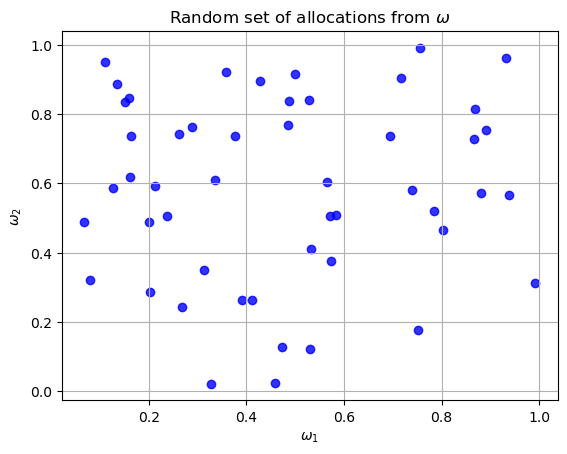

In [54]:
# Plot a random set of allocations
model.plot_random_allocations()


# Question 8

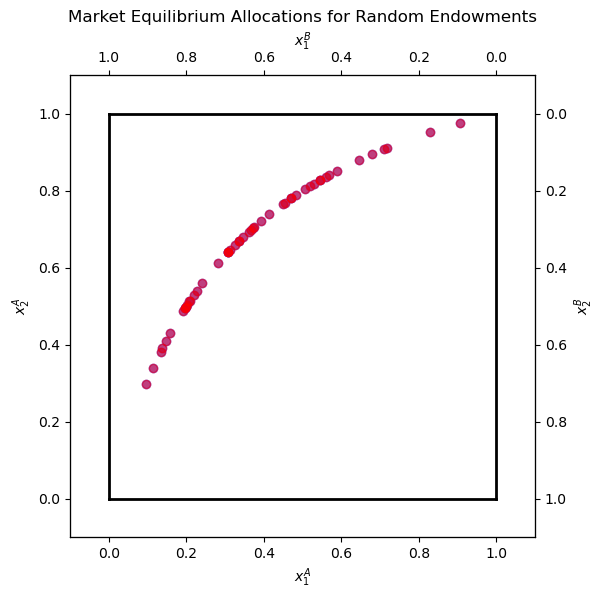

In [55]:
# Generate a set W with 50 random endowments
W = model.generate_random_endowments(num_elements=50)

# Plot the market equilibrium allocations for each endowment in W
model.plot_random_endowments(W)